<a href="https://colab.research.google.com/github/serdarbozoglan/NLP/blob/master/Keras/Text_Classifiaction_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt
Saving imdb_labelled.txt to imdb_labelled.txt
Saving yelp_labelled.txt to yelp_labelled.txt


In [0]:
import io
df_amazon = pd.read_csv(io.BytesIO(uploaded['amazon_cells_labelled.txt']), names=['sentence', 'label'],sep='\t')

In [7]:
df_amazon.head()

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [0]:
df_imdb = pd.read_csv(io.BytesIO(uploaded['imdb_labelled.txt']), names=['sentence', 'label'],sep='\t')

In [9]:
df_imdb.head()

,sentence,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [0]:
df_yelp = pd.read_csv(io.BytesIO(uploaded['yelp_labelled.txt']), names=['sentence', 'label'],sep='\t')

In [13]:
df_amazon.shape

(1000, 2)

In [0]:
df = pd.concat([df_amazon, df_imdb, df_yelp])

In [12]:
df.head()

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [14]:
df.shape

(2748, 2)

In [15]:
df.iloc[0]

sentence    So there is no way for me to plug it in here i...
label                                                       0
Name: 0, dtype: object

In [0]:
sentence = ['John likes ice cream', 'John hates chocolate']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)

In [21]:
vectorizer.fit(sentence)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [22]:
vectorizer.vocabulary_

{'John': 0, 'chocolate': 1, 'cream': 2, 'hates': 3, 'ice': 4, 'likes': 5}

In [24]:
vectorizer.transform(sentence)

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [26]:
vectorizer.transform(sentence).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# .values returns a NumPy array instead of Pandas Series
sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

In [32]:
sentences[:5]

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.'],
      dtype=object)

In [0]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y , test_size=0.25, random_state=1000)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [38]:
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [0]:
#vectorizer.vocabulary_

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
classifier =LogisticRegression()

In [46]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
score_yelp = classifier.score(X_test, y_test)

In [49]:
print(f"Accuracy of YELP DATASET is {score_yelp}")

Accuracy of YELP DATASET is 0.796


In [70]:
sentences = df_amazon['sentence'].values
y = df_amazon['label'].values


sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y , test_size=0.25, random_state=1000)


vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

classifer = LogisticRegression()
classifier.fit(X_train, y_train)
score_amazon = classifier.score(X_test, y_test)

print(f"Accuracy of AMAZON DATASET is {score_amazon}")

Accuracy of AMAZON DATASET is 0.796


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
sentences = df_imdb['sentence'].values
y = df_imdb['label'].values


sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y , test_size=0.25, random_state=1000)


vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

classifer = LogisticRegression()
classifier.fit(X_train, y_train)
score_imdb = classifier.score(X_test, y_test)

print(f"Accuracy of IMDB DATASET is {score}")

Accuracy of IMDB DATASET is 0.7486631016042781


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [93]:
print(f"Accuracy of AMAZON DATASET is {round(score_amazon, 3):.>{10}}")
print(f"Accuracy of YELP DATASET is {round(score_yelp, 3):.>{12}}")
print(f"Accuracy of IMDB DATASET is {round(score_imdb, 3):.>{12}}")

Accuracy of AMAZON DATASET is .....0.796
Accuracy of YELP DATASET is .......0.749
Accuracy of IMDB DATASET is .......0.749


In [0]:
## KERAS MODEL

In [0]:
from keras.models import Sequential
from keras import layers
#from keras import Dense

In [99]:
X_train.shape 
## We have 561 document by 2505 terms(words/feature)

(561, 2505)

In [0]:
input_dim = X_train.shape[1] # Num of features

In [106]:
model = Sequential()
model.add(layers.Dense(10 , input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(X_train, y_train,
                   epochs=100,
                   verbose=False,
                   validation_data=(X_test, y_test),
                   batch_size=10)

Instructions for updating:
Use tf.cast instead.


In [120]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print(f"Training Accuracy : {(accuracy)}")
loss, accuracy =model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy : {round(accuracy, 3)}")

Training Accuracy : 1.0
Testing Accuracy : 0.791


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc)+1)
  
  
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  plt.plot(x, acc, 'b', label='Traning acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Trainig and Validation Accuracy')
  plt.legend()
  
  plt.subplot(1,2,2)
  plt.plot(x, loss, 'b', label='Traning loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Trainig and Validation Loss')
  plt.legend()

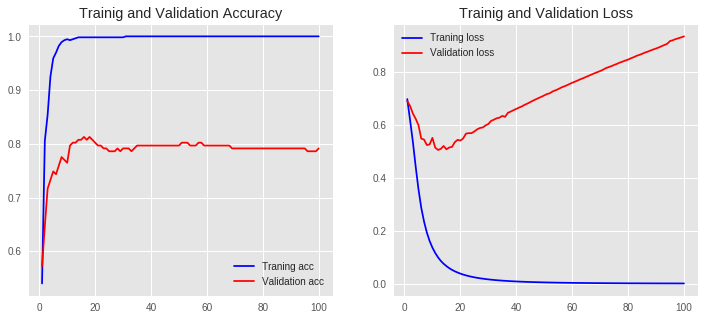

In [125]:
plot_history(history)

You can see that we have trained our model for too long since the training set reached 100% accuracy. A good way to see when **the model starts overfitting is when the loss of the validation data starts rising again**. This tends to be a good point to stop the model. You can see this around 20-40 epochs in this training.

In [128]:
# LabelEncoder

cities = ['London', 'Berlin', 'Berlin', 'New York', 'London']
cities

['London', 'Berlin', 'Berlin', 'New York', 'London']

In [130]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
city_labels = encoder.fit_transform(cities)
city_labels

array([1, 0, 0, 2, 1])

In [0]:
# For label encoding it is sorted from A to Z then London index is 1, Berlin is 0 and New York is 2

In [132]:
# OneHot Encoder

# OneHotEncoder expects each categorical value to be in a separate row, 
#so you’ll need to reshape the array, then you can apply the encoder:

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
city_labels = city_labels.reshape((5,1))
encoder.fit_transform(city_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [143]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)


X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index)+1 # Adding 1 due to reserved

print(sentences_train[4])
print(X_train[4])

Not frightening in the least, and barely comprehensible.  
[21, 392, 10, 1, 198, 3, 393, 937]


In [139]:
vocab_size

2575

The indexing is **ordered after the most common words** in the text, which you can see by the word the having the index 1.  It is important to note that the**[ index 0 is reserved ](https://)**and is not assigned to any word. This zero index is used for padding, 

Unknown words (words that are not in the vocabulary) are denoted in Keras with word_count + 1 since they can also hold some information. You can see the index of each word by taking a look at the word_index dictionary of the Tokenizer object:

In [146]:
for word in ['the', 'all', 'good', 'because']:
  print(f"{word:>{8}} {tokenizer.word_index[word]:>{10}}")

     the          1
     all         27
    good         33
 because         64


Pay close attention to the difference between this technique and the X_train that was produced by scikit-learn’s** CountVectorizer.**

With CountVectorizer, we had stacked vectors of word counts, and each vector was **the same length** (the size of the total corpus vocabulary). **With Tokenizer**, the resulting vectors** equal the length of each text, **and the numbers don’t denote counts, but rather correspond to the word values from the dictionary tokenizer.word_index.

One problem that we have is that each text sequence has in most cases different length of words. To counter this, you can use 

```
# pad_sequence
```

which simply pads the sequence of words with zeros. 


Additionally you would want to add a **maxlen **parameter to specify how long the sequences should be. This cuts sequences that exceed that number. In the following code, you can see how to pad sequences with Keras:

In [0]:
from keras.preprocessing.sequence import pad_sequences

maxlen=100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [152]:
print(X_train[5, :])

[  8  12  14 311 199  14 938 394  14 939  12 112  31   1 255   4  49 173
  17 940  38  49 941 565   4 942 943 944 945   1 566   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [160]:
from keras.models import Sequential
from keras import layers

embedding_dim =50

model = Sequential()
model.add(layers.Embedding(input_dim = vocab_size,
                           output_dim = embedding_dim,
                          input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________


You can now see that we have **128750** new parameters to train. This number comes from **vocab_size times the embedding_dim**. These weights of the embedding layer are initialized with random weights and are then adjusted through backpropagation during training.

Training Accuracy : 1.0
Testing Accuracy : 0.701


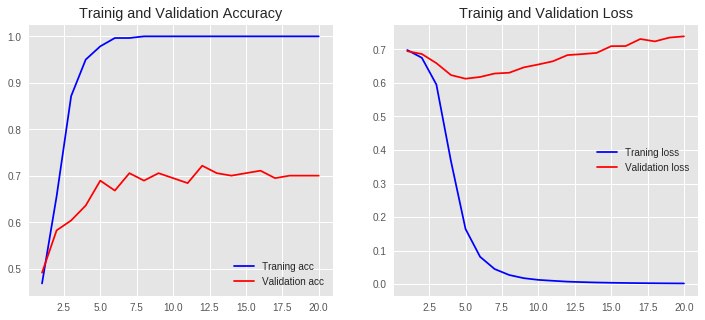

In [162]:
history = model.fit(X_train, y_train,
                   epochs=20,
                   verbose=False,
                   validation_data = (X_test, y_test),
                   batch_size =10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print(f"Training Accuracy : {(accuracy)}")
loss, accuracy =model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy : {round(accuracy, 3)}")
plot_history(history)
                    
                    
                   

Another way to work with embeddings is by using a **MaxPooling1D/AveragePooling1D** or a **GlobalMaxPooling1D/GlobalAveragePooling1D** layer after the embedding. You can think of the pooling layers as a way to downsample **(a way to reduce the size of**) the incoming feature vectors.

In the case of max pooling you take the maximum value of all features in the pool for each feature dimension. In the case of average pooling you take the average, but max pooling seems to be more commonly used as it highlights large values.

In [164]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Training Accuracy: 1.0000
Testing Accuracy:  0.7594


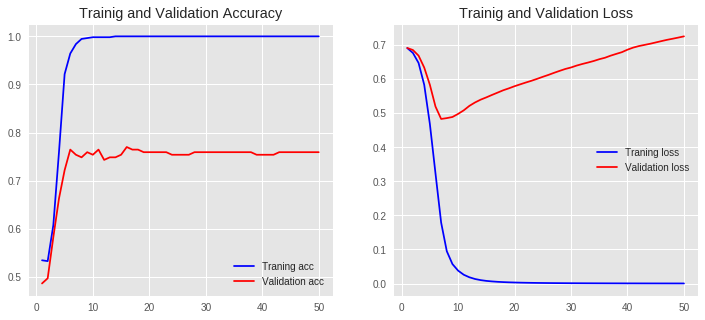

In [165]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
## USING PRETRAINED WORD EMBEDDINGS



. Word2Vec achieves this by employing neural networks and GloVe achieves this with a co-occurrence matrix and by using matrix factorization. In both cases you are dealing with dimensionality reduction, but Word2Vec is more accurate and GloVe is faster to compute.

In [0]:
from gensim.models import FastText